# Importing the relevant library

In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Load the Data

In [2]:
raw_data = pd.read_csv('car-data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing the data

## Exploring the descriptive statiistics of all variable

In [3]:
raw_data.describe(include= 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Cleaning the data

In [21]:
# Checking Missing Data
data = raw_data
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [22]:
# Clean the missing data
data = data.dropna(axis = 0)

In [23]:
# Drop the model column because it has to many unique value
data = data.drop(['Model'], axis = 1)

In [24]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


## Checking Outlayer data 

<AxesSubplot:xlabel='Price', ylabel='Count'>

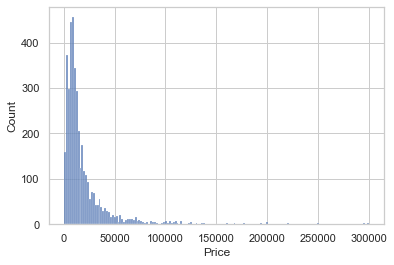

In [25]:
# Checking outlayer from price variabel with graph
sns.histplot(data['Price'])

From the graph there was outliers that concentrated in the right side of the graph, so that will be removed. The 99% Quantile of Prive Data will be removed

In [26]:
q = data['Price'].quantile(0.99)
data= data[data['Price'] < q]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

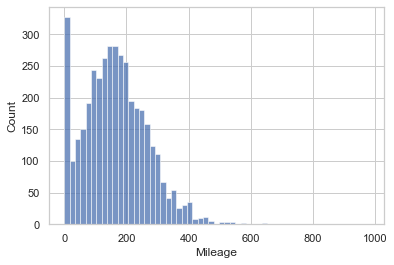

In [28]:
# Checking outlayer from Milage Data
sns.histplot(data['Mileage'])

From the graph there was outliers that concentrated in the right side of the graph, so that will be removed. The 99% Quantile of Mileage Data will be removed

In [29]:
 q = data['Mileage'].quantile(0.99)
data= data[data['Mileage'] < q]

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

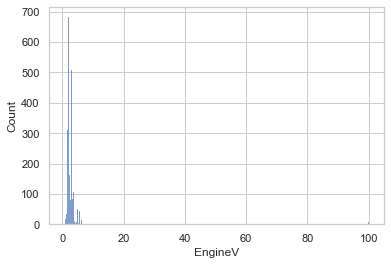

In [31]:
# Checking outlayer from EngineV Data
sns.histplot(data['EngineV'])

The data showed some wierd number, the engine value was range from 0.6 to 6.5. It needs to be cleaned from values that > 6.5 because it can be wron data or null data

In [32]:
data= data[data["EngineV"] < 6.5]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Year', ylabel='Count'>

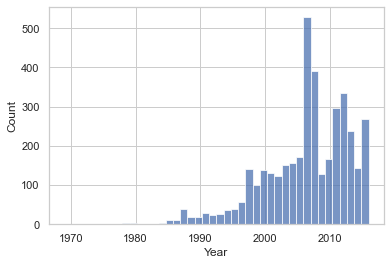

In [33]:
# Checking outlayer from Year Data
sns.histplot(data['Year'])

From the graph there was outliers that concentrated in the left side of the graph, so that will be removed. The 1% Quantile of the Year Data will be removed. 

In [34]:
q = data['Year'].quantile(0.01)
data = data[data['Year'] > q]

In [35]:
# Clear and Reset The index
data =  data.reset_index(drop = True)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking OLS Assumption

### Checking Linearity

Use scatterplot to check the corelation of independent and dependent variabel (numerical data) the independet variabel is Price the dependent variable are Mileage, EngineV, and Year

Text(0.5, 1.0, 'Price & Year')

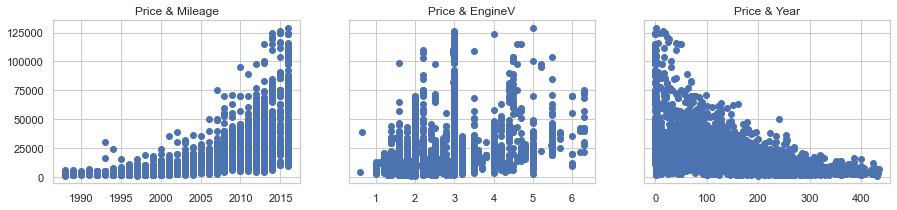

In [38]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data['Year'], data['Price'])
ax1.set_title('Price & Mileage')
ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('Price & Year')

The graph can show us that the variable is not have a linear corelation. To deal with this issue we can transform our dependent variable with log transformation

In [39]:
log_price = np.log(data['Price'])
data['log_price'] = log_price

Text(0.5, 1.0, 'Price & Year')

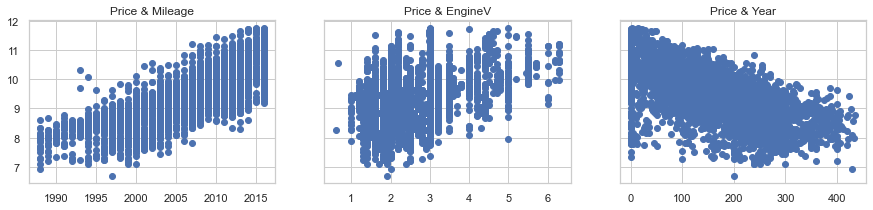

In [41]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data['Year'], data['log_price'])
ax1.set_title('Price & Mileage')
ax2.scatter(data['EngineV'], data['log_price'])
ax2.set_title('Price & EngineV')
ax3.scatter(data['Mileage'], data['log_price'])
ax3.set_title('Price & Year')

From the graph we can see more linear corelation than before. Because the price Variable is no longer used, it will be droped. 

In [42]:
data = data.drop(['Price'], axis = 1)

In [44]:
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### Checking Multicolinearity

For checking multicolinearity 'variance inflation factor' (VIF) wil be used To make this as easy as possible to use, we declare a variable where we put all features where we want to check for multicollinearity since our categorical data is not yet preprocessed, we will only take the numerical ones. 

In [56]:
# Pick numerical variable 
variables = data[['Mileage', 'Year', 'EngineV']]

# Make DataFrame to store all VIF
vif = pd.DataFrame()

# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
i = 0
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [57]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Since Year has the highest VIF, It will removed from the model. This will drive the VIF of other variables down, so even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case

In [58]:
data = data.drop(['Year'], axis = 1)
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Create Dummy Variable

To include the categorical data in the regression, let's create dummies. There is a very convenient method called: 'get_dummies' which does that seemlessly. It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

In [59]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange the data 

To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df

In [61]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [62]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [63]:
data = data[cols]
data.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model

## Declare Inputs and Targets

In [64]:
# The targets or dependent variable is 'log price'
targets = data['log_price']

In [65]:
# The inputs or independent variables are everything nut the targets
inputs = data.drop(['log_price'], axis = 1)

## Scale the data

In [68]:
# Create scaler object
scaler = StandardScaler()

#Fit the inputs 
scaler.fit(inputs)

# Scale the features and store them in a new variable
inputs_scaled = scaler.transform(inputs)

## Train and Test Split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Create the regression

In [73]:
# Create a linear regression object
reg = LinearRegression()

# Fit the regression with the scaled train inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
# check the outputs of the regression
y_out =  reg.predict(x_train)

The simplest way to compare the targets (y_train) and the predictions (y_out) is to plot them on a scatter plot. The closer the points to the 45-degree line, the better the prediction

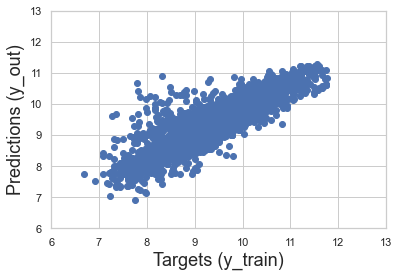

In [75]:
plt.scatter(y_train, y_out)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_out)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Another useful check of our model is a residual plot, plot the PDF of the residuals and check for anomalies

D:\python\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

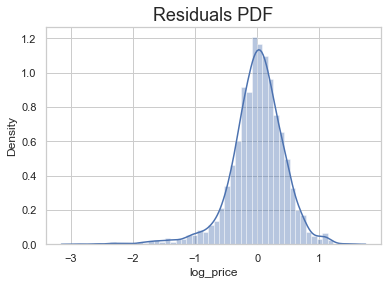

In [76]:
sns.distplot(y_train - y_out)
plt.title("Residuals PDF", size=18)

In the best case scenario this plot should be normally distributed. In this case, there are many negative residuals (far away from the mean). Given the definition of the residuals (y_train - y_out), negative values imply that redictions are much higher than the targets.

## Find the R-Squared value from the model

In [77]:
reg.score(x_train,y_train)

0.744996578792662

## Find Weight and Bias

In [80]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.415239458021299

In [79]:
# Obtain the weights (coefficients) of the regression
reg.coef_


# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Testing

Testing is done on a dataset that the algorithm has never seen. Our test inputs are 'x_test', while the outputs: 'y_test' . If the predictions are far off, we will know that our model overfitted

In [81]:
y_out_test = reg.predict(x_test)

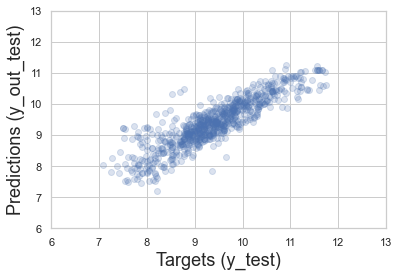

In [82]:
plt.scatter(y_test, y_out_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_out_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Let's manually check these predictions. To obtain the actual prices, take the exponential of the log_price

In [92]:
result = pd.DataFrame(np.exp(y_out_test), columns=['Prediction'])
result.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


### manually compare the test traget in that data frame

In [93]:
y_test = y_test.reset_index(drop=True)

result['Target'] = np.exp(y_test)

result['Residual'] = result['Target'] - result['Prediction']
result['Difference%'] = np.absolute(result['Residual']/result['Target']*100)
result

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [94]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
result.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
